<a href="https://colab.research.google.com/github/vishnuvardhanreddyav/Data_sci/blob/main/FA_assignment_21MBMB40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install snscrape

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [3]:
#Scraping tweets of Microsoft.
query = "(from:microsoft) until:2022-11-01 since:2022-10-01"
tweets = []
limit = 5000

In [11]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.content])

In [13]:
tweets

[[datetime.datetime(2022, 10, 31, 20, 48, 24, tzinfo=datetime.timezone.utc),
  'Microsoft',
  '@SamsungUS Treats FTW!'],
 [datetime.datetime(2022, 10, 31, 20, 47, 29, tzinfo=datetime.timezone.utc),
  'Microsoft',
  '@jkline120 Truly.'],
 [datetime.datetime(2022, 10, 31, 20, 37, 23, tzinfo=datetime.timezone.utc),
  'Microsoft',
  '@PycraftDev 👀 that is very brave'],
 [datetime.datetime(2022, 10, 31, 20, 32, 26, tzinfo=datetime.timezone.utc),
  'Microsoft',
  '@MicrosoftFlip Costumes are 10/10.'],
 [datetime.datetime(2022, 10, 31, 20, 31, 33, tzinfo=datetime.timezone.utc),
  'Microsoft',
  '@anthonydavenpod Since you asked nicely ... 🍭'],
 [datetime.datetime(2022, 10, 31, 18, 15, 48, tzinfo=datetime.timezone.utc),
  'Microsoft',
  'We uncovered this terrifying book series in the Microsoft Archives. 🎃 https://t.co/p4wBa4Gmgy'],
 [datetime.datetime(2022, 10, 28, 23, 0, 1, tzinfo=datetime.timezone.utc),
  'Microsoft',
  "Choppy sound, frozen video, buffering—a poor network connection has li

In [14]:
df = pd.DataFrame(tweets)
df.head(5)


,0,1,2
0,2022-10-31 20:48:24+00:00,Microsoft,@SamsungUS Treats FTW!
1,2022-10-31 20:47:29+00:00,Microsoft,@jkline120 Truly.
2,2022-10-31 20:37:23+00:00,Microsoft,@PycraftDev 👀 that is very brave
3,2022-10-31 20:32:26+00:00,Microsoft,@MicrosoftFlip Costumes are 10/10.
4,2022-10-31 20:31:33+00:00,Microsoft,@anthonydavenpod Since you asked nicely ... 🍭


In [19]:
df.drop([0,1], axis=1)

,2
0,@SamsungUS Treats FTW!
1,@jkline120 Truly.
2,@PycraftDev 👀 that is very brave
3,@MicrosoftFlip Costumes are 10/10.
4,@anthonydavenpod Since you asked nicely ... 🍭
...,...
611,None
612,None
613,None
614,None


In [21]:
df.dropna(inplace = True)

In [23]:
df.drop([0,1], axis=1, inplace = True)

In [24]:
df

,2
0,@SamsungUS Treats FTW!
1,@jkline120 Truly.
2,@PycraftDev 👀 that is very brave
3,@MicrosoftFlip Costumes are 10/10.
4,@anthonydavenpod Since you asked nicely ... 🍭
...,...
303,@teenuhzee Why not? 😄
304,@mermaid_daisy Would you like some popcorn wit...
305,@AirlineFlyer It's not ideal.
306,@petitroll Necessary. 😭


In [7]:
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [8]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [25]:
cleaned_tweets = []

for tweet in df[2]:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [26]:
df['cleaned'] = pd.DataFrame(cleaned_tweets)
df.head(5)

,2,cleaned
0,@SamsungUS Treats FTW!,treats ftw
1,@jkline120 Truly.,truly
2,@PycraftDev 👀 that is very brave,that is very brave
3,@MicrosoftFlip Costumes are 10/10.,costumes are 10 10
4,@anthonydavenpod Since you asked nicely ... 🍭,since you asked nicely


In [27]:
df[['polarity', 'subjectivity']] = df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp

df.head(5)

,2,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@SamsungUS Treats FTW!,treats ftw,0.0,0.0,positive,0.0,0.250,0.750,0.4588
1,@jkline120 Truly.,truly,0.0,0.0,positive,0.0,0.000,1.000,0.4404
2,@PycraftDev 👀 that is very brave,that is very brave,1.0,1.0,positive,0.0,0.448,0.552,0.5709
3,@MicrosoftFlip Costumes are 10/10.,costumes are 10 10,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
4,@anthonydavenpod Since you asked nicely ... 🍭,since you asked nicely,0.6,1.0,positive,0.0,0.508,0.492,0.4404


In [28]:
#Creating new data frames for all sentiments (positive, negative and neutral)

df_negative = df[df["sentiment"]=="negative"]
df_positive = df[df["sentiment"]=="positive"]
df_neutral = df[df["sentiment"]=="neutral"]

In [29]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [30]:
count_values_in_column(df,"sentiment")

,Total,Percentage
neutral,175,56.82
positive,113,36.69
negative,20,6.49


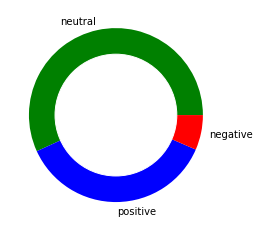

In [31]:
# create data for Pie Chart
pichart = count_values_in_column(df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#**Finding price changes for the same period of microsoft**

In [ ]:
pip install yfinance

In [3]:
import yfinance as yf

In [4]:
#define the ticker symbol
tickerSymbol = 'MSFT'


In [5]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [6]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2022-10-01', end='2022-11-01') 

In [7]:
#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-03 00:00:00-04:00,234.748438,240.931012,234.000546,240.063461,28880400,0,0
2022-10-04 00:00:00-04:00,244.401230,249.656424,244.291539,248.180588,34888400,0,0
2022-10-05 00:00:00-04:00,245.298709,249.875806,243.414021,248.499680,20347100,0,0
2022-10-06 00:00:00-04:00,247.233247,249.636477,245.388455,246.096451,20239900,0,0
2022-10-07 00:00:00-04:00,240.223014,240.641847,232.514741,233.581741,37769600,0,0
2022-10-10 00:00:00-04:00,232.395083,233.900834,226.092836,228.605759,29743600,0,0
2022-10-11 00:00:00-04:00,226.980331,228.416287,223.480201,224.776550,30474000,0,0
2022-10-12 00:00:00-04:00,224.766563,227.219656,223.330622,225.115585,21903900,0,0
2022-10-13 00:00:00-04:00,219.232181,235.436515,218.514203,233.581741,42551800,0,0


In [11]:
tickerDf1 = tickerDf.drop(['Open','High','Low','Volume','Dividends','Stock Splits'], axis=1)

In [12]:
tickerDf1

,Close
Date,
2022-10-03 00:00:00-04:00,240.063461
2022-10-04 00:00:00-04:00,248.180588
2022-10-05 00:00:00-04:00,248.499680
2022-10-06 00:00:00-04:00,246.096451
2022-10-07 00:00:00-04:00,233.581741
2022-10-10 00:00:00-04:00,228.605759
2022-10-11 00:00:00-04:00,224.776550
2022-10-12 00:00:00-04:00,225.115585
2022-10-13 00:00:00-04:00,233.581741


In [13]:
tickerDf1.isnull().sum()

Close    0
dtype: int64

In [16]:
import plotly.express as px

In [17]:
fig_price = px.line(tickerDf1, title='MSFT stock price change in the same period')
fig_price.show()

Since the majority of the tweets are of **neutral sentiment**, the price change trend could be seen as a line parallel to x axis i.e. constant.
The decrease in the price at the end of the time period could be result of other factors which could be asessed by the **Technical Analysis** and **Fundamental Analysis** of the stock in addition to the **Sentiment Analysi**s.